# The plucked and hammered string

This is taken mainly from Boas, Ch. 17 and 13, and serves as a nice review of much of the class.

## Given the shape of a plucked string at t=0, what does its time evolution look like?

Say we have plucked a guitar (or fiddle!) string in the following shape at time $t=0$:

In [1]:
import numpy as np, scipy as sp, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

In class, we figured out that the equation we wanted for the plucked string was:

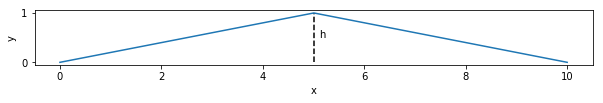

In [2]:
ell = 10
h = 1
npts = 1000
x = np.linspace(0,ell,npts)
# Here is the function
y_exact = 2*h*x/ell
y_exact[npts//2:] = -2*h*x[npts//2:]/ell + 2*h

# The rest is for cute plotting.
fig = plt.figure(figsize=(ell,h))
plt.plot(x,y_exact)
plt.xlabel('x')
plt.ylabel('y')
plt.vlines([ell/2],[0],[h],linestyle='--',label='h')
plt.text(1.02*ell/2,h/2,'h')
plt.show()

What does the time evolution look like? Our strategy is

1. Find the appropriate PDE
2. Solve it in general
3. Solve it for our particular initial conditions

From Chapter 13 (and our class discussions and your intro mechanics class), we know that we're looking for the wave equation

$$
\nabla^2u=\frac{1}{v^2}\frac{\partial^2u}{\partial t^2}
$$

Here, we look specifically for $y(x,t)$, and this becomes 

$$
\frac{\partial^2y}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2 y}{\partial t^2}
$$

... Standard SOV ...

... Solve the thing ...

## Warm up problem

Let f(x) be 0 from 0 to $l$, then 1 from $l$ to $2l$, then repeat. What are the $c_n$'s?

... we solved this, and found ...

$$
c_n = \left\{\begin{matrix}
\frac{1}{2} & n=0\\ 
0 & n \mathrm{\ is\ even\ (cosine\ terms)}\\ 
\frac{-1}{in\pi} &  n \mathrm{\ is\ odd}
\end{matrix}\right.
$$

Which we can plot

In [3]:
def isodd(n):
    return divmod(n,2)[1] == 1
def iseven(n):
    return divmod(n,2)[1] == 0
for i in range(10):
    print(i,isodd(i),iseven(i))

0 False True
1 True False
2 False True
3 True False
4 False True
5 True False
6 False True
7 True False
8 False True
9 True False


In [4]:
def a(n):
    if n == 0:
        return 2
    else:
        return 0
def b(n):
    if isodd(n):
        return -3/(n*np.pi)
    else:
        return -1/(n*np.pi)
def c(n):
    if isodd(n):
        return (-1)/(1j* n  *np.pi) * np.exp(1j *   n  * np.pi * x / ell)
    else:
        return 0

def plotseries_c(N=1):
    x = np.linspace(-2.1*ell,2.1*ell,1000)
    fig = plt.figure()
    y = np.zeros_like(x)

    for n in range(0,N+1):
        if n == 0:
            this_term = np.zeros_like(y) + 1/2
        else:
            this_term = c( n)*np.exp(1j *  n * np.pi * x / ell)
            this_term += c(-n)*np.exp(1j *(-n)* np.pi * x / ell)
        this_term = np.real(this_term)
        plt.plot(x,this_term,alpha=0.5,label='term $\pm${n}'.format(n=n))
        y += this_term
    plt.plot(x,y,'k--',label='approximation')
    plt.legend()
interact(plotseries_c,N=(0,100))

interactive(children=(IntSlider(value=1, description='N'), Output()), _dom_classes=('widget-interact',))

<function __main__.plotseries_c>

## Back to the topic at hand

... solving, solving ...

We get that the $b_n$'s for our plucked string are $\frac{8h}{n^2\pi^2}\sin\frac{n\pi}{2}$ where the sign goes +1, 0, -1, 0, +1, 0, ... so

$$
f(x,0) = \frac{8h}{\pi^2}\left(\sin\frac{\pi x}{l}
-\frac{1}{3^2}\sin\frac{3\pi x}{l}
+\frac{1}{5^2}\sin\frac{5\pi x}{l}
...\right)
$$

and let's just go right ahead and plot that. How are we going to get the series of ones and zeros? $(-1)^{(n-1)/2}$ does it, as long as we're only looking at the real part.

In [5]:
def triangle_coef(n):
    c = ((-1)**((n-1)/2)).real
    return np.round(c) # you often get .1e-16 instead of 0, for instance
for i in range(10):
    print(triangle_coef(i),end=", ")

0.0, 1.0, 0.0, -1.0, -0.0, 1.0, 0.0, -1.0, -0.0, 1.0, 

In [6]:
def plot_static_terms(N=1):
    fig = plt.figure(figsize=(ell,h*2.1))
    plt.plot(x,y_exact,'k',label='exact')
    y = np.zeros_like(x)
    for n in range(1,N+1):
        if iseven(n):
            continue
        this_term = (8*h/np.pi**2)*triangle_coef(n)*(1/n**2)*np.sin(n*np.pi*x/ell)
        plt.plot(x,this_term,alpha=0.5,label='term {n}'.format(n=n))
        y = y + this_term
    plt.plot(x,y,'k--',label='approximation')
    plt.legend()
    plt.show()
interact(plot_static_terms,N=(0,10))

interactive(children=(IntSlider(value=1, description='N', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_static_terms>

## And what's your final answer?

Remember, our final answer was

$$
y = \sum_{n=1}^{\infty} b_n \sin{\frac{n\pi x}{l}} \cos{\frac{n\pi vt}{l}} \\
= \frac{8h}{\pi^2}\left(\sin\frac{\pi x}{l} \cos{\frac{\pi vt}{l}}
-\frac{1}{3^2}\sin\frac{3\pi x}{l} \cos{\frac{3\pi vt}{l}}
+\frac{1}{5^2}\sin\frac{5\pi x}{l} \cos{\frac{5\pi vt}{l}}
...\right)
$$

so let's graph that.

In [7]:
def plot_plucked_terms(N=6,t=0.25,v=10):
    fig = plt.figure(figsize=(ell,h*2.1*2))
    plt.plot(x,y_exact,'k',label='exact',alpha=0.5)
    y = np.zeros_like(x)
    for n in range(1,N+1):
        if n%2 == 0: continue
        this_term = (8*h/np.pi**2)*triangle_coef(n)*(1/n**2)*np.sin(n*np.pi*x/ell)
        this_term = this_term*np.cos(n*np.pi*v*t/ell)
        plt.plot(x,this_term,alpha=0.3,label='term {n}'.format(n=n))
        y = y + this_term
    plt.plot(x,y,'k--',label='approximation')
    plt.ylim([-h*1.1,h*1.1])
    plt.legend()
    plt.show()
interact(plot_plucked_terms,N=(0,15),t=(0,5,0.05),v=fixed(5))

interactive(children=(IntSlider(value=6, description='N', max=15), FloatSlider(value=0.25, description='t', max=5.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_plucked_terms>

## Other ways

In class, we also did the complex version.

## Hammered string, i.e. piano

We solved this in class, for a velocity pulse of witdh $2w$ centered at $l/2$. Our solution was informative in its written form:

$$
y = \sum_{n=1}^{\infty} B_n \sin{\frac{n\pi w}{l}} \sin{\frac{n\pi x}{l}} \cos{\frac{n\pi vt}{l}} \\
= \frac{4v_0l}{\pi^2 v}\left(\sin{\frac{\pi w}{l}} \sin\frac{\pi x}{l} \cos{\frac{\pi vt}{l}}
-\frac{1}{3^2}\sin{\frac{3\pi w}{l}} \sin\frac{3\pi x}{l} \cos{\frac{3\pi vt}{l}}
+\frac{1}{5^2}\sin{\frac{5\pi w}{l}} \sin\frac{5\pi x}{l} \cos{\frac{5\pi vt}{l}}
...\right)
$$

where $B_n$ is the thing we had as $b_n$ before, $c$ is the speed of the wave

- the coefficients look like before, but now also depend on an extra term which contains $w$ and $l$. 
- That term, however, does not contain any of our variables ($x$, $t$), so it really does get wrapped up as a coefficient, which we write as $b_n$. 
- The leading part of the coefficient also changed in form.

Also, it's quite important to note that we dropped the $\cos(t)$ solutions in favor of the $\sin(t)$ solutions, since the initial displacement is zero.

In [8]:
def plot_hammered_terms(N=50,t=0.72,v=6,w=ell/8,ymax=0.7,v0=2.5):
    fig = plt.figure(figsize=(ell,h*2.1*2))
    #plt.plot(x,y_exact,'k',label='exact',alpha=0.5)
    y = np.zeros_like(x)
    for n in range(1,N+1):
        if n%2 == 0: continue
        this_term = (4*v0*ell/(v*np.pi**2))*triangle_coef(n)*(1/n**2)*np.sin(n*np.pi*x/ell)
        this_term = this_term*np.sin(n*np.pi*v*t/ell)
        this_term = this_term*np.sin(n*np.pi*w/ell)
        plt.plot(x,this_term,alpha=0.3,label='term {n}'.format(n=n))
        y = y + this_term
    plt.plot(x,y,'k--',label='approximation')
    plt.ylim([-ymax,ymax])
    plt.legend()
    plt.show()
interact(plot_hammered_terms,N=(0,55),t=(0,2,0.01),ymax=(.1,5,0.1),v0=(1,5,.1))

interactive(children=(IntSlider(value=50, description='N', max=55), FloatSlider(value=0.72, description='t', max=2.0, step=0.01), IntSlider(value=6, description='v', max=18, min=-6), FloatSlider(value=1.25, description='w', max=3.75, min=-1.25), FloatSlider(value=0.7, description='ymax', max=5.0, min=0.1), FloatSlider(value=2.5, description='v0', max=5.0, min=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_hammered_terms>